<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2. Ames Housing Data


Submitted by: Goh Chun Shan
GA DSI-7

--- 

## Contents:

## [1. EDA](#Step-1.-EDA)
- **Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

## [2. Data Cleaning](#Step-2.-Data-Cleaning)
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

## [3. Exploratory Visualisations](#Step-3.-Exploratory-Visualisations)
- Look at distributions.
- Look at correlations.
- Look at relationships to target (scatter plots for continuous, box plots for categorical).

## [4. Pre-processing](#Step-4.-Pre-processing)
- One-hot encode categorical variables.
- Train/test split your data.
- Scale your data.
- Consider using automated feature selection.

## [5. Modelling](#Step-5.-Modelling)
- **Establish your baseline score.**
- Fit linear regression. Look at your coefficients. Are any of them wildly overblown?
- Fit lasso/ridge/elastic net with default parameters.
- Go back and remove features that might be causing issues in your models.
- Tune hyperparameters.
- **Identify a production model.** (This does not have to be your best performing Kaggle model, but rather the model that best answers your problem statement.)
- Refine and interpret your production model.

## [6. Inferential Visualizations](#Step-6.-Inferential-Visualizations)
- Look at feature loadings.
- Look at how accurate your predictions are.
- Is there a pattern to your errors? Consider reworking your model to address this.

## [7. Conclusions and Recommendations](#Step-7.-Conclusions-and-Recommendations)
- Which features appear to add the most value to a home?
- Which features hurt the value of a home the most?
- What are things that homeowners could improve in their homes to increase the value?
- What neighborhoods seem like they might be a good investment?
- Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?
--- 

## Problem statements:
1. What features influence the sale price of a house most significantly?
2. To predict the expected sale price of a house given a set of features.


# Step 1. EDA

The [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) is found here.

Variable Descriptors:

The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df_train = pd.read_csv(f'datasets/train.csv')
df_test = pd.read_csv(f'datasets/test.csv')

In [3]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


There are 81 columns in the dataset. Excluding the Y variable 'SalePrice' which the model is trying to predict, and the identifier 'Id', and 'PID' Parcel Identification Number which do not have numerical significance, there are a total of 78 data columns. We wish to sort these data into numerical and categorical variables first.

In [4]:
df_train.shape

(2051, 81)

In [5]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
df_test.shape
# Only one column missing, which is 'SalePrice' that we wish to predict.

(878, 80)

In [7]:
too_many_null_values = df_train.isnull().sum()
too_many_null_values = too_many_null_values[too_many_null_values>1000]
too_many_null_values

Alley           1911
Pool QC         2042
Fence           1651
Misc Feature    1986
dtype: int64

Ordinal data should be expressed as numerical and not categorical.

In [8]:
#subset out the ordinal data listed from data dictionary
# Ordinal data means : either rating 1 to 10, or rating Excellent to Poor

#Total 23 ordinal variables
ordinal_cols = ['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Bsmt Qual',
                'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC','Electrical', 
                  'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive',
                'Pool QC', 'Fence' ]

In [9]:
ordinal_to_num_dict = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa' : 2, 'Po': 1, 'NA':0, 
                       #Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, HeatingQC, KitchenQual, FireplaceQu, Garage Qual, 
                       #Garage Cond, Pool QC
                       'Av':3, 'Mn': 2, 'No': 1, #Bsmt Exposure
                       'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, #BsmtFin Type 1, BsmtFin Type 2
                       'Fin': 3, 'RFn': 2, #Garage Finish
                      'Typ':8, 'Min1':7, 'Min2':6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1, #Functional
                       'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1 , #Lot Shape
                       'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1, #Utilities 
                       'Gtl': 3, 'Mod': 2, 'Sev': 1, #LandSlope
                      'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA': 0, #Fence
                       'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1, #Electrical
                       'Y':3, 'P':2, 'N':1 , np.nan:0  #Paved Drive
                      }


In [10]:
for x in ordinal_cols:
    df_train[x] = df_train[x].apply(lambda i: int(ordinal_to_num_dict[i]))
    df_test[x] = df_test[x].apply(lambda i: int(ordinal_to_num_dict[i]))

In [11]:
#Change 'MS SubClass' variable to string type
df_train['MS SubClass'] = df_train['MS SubClass'].apply(lambda x:str(x))
df_test['MS SubClass'] = df_test['MS SubClass'].apply(lambda x:str(x))

Separate the numerical and categorical columns.

In [12]:
cols = df_train.columns
num_cols = df_train._get_numeric_data().columns #includes int or float types
num_cols = list(num_cols)

From numerical columns, drop 'Id', 'PID' and 'SalePrice'.

In [13]:
num_cols = list(set(num_cols)- set(['Id', 'PID', 'SalePrice']))

Extract the categorical columns.

In [14]:
cat_cols = list(set(cols) - set(num_cols) - set(['Id','PID','SalePrice']))

In [15]:
print(f'\n Total no. of columns with numerical data: {len(num_cols)} \n Total no. of columns with non-numerical data: {len(cat_cols)}')


 Total no. of columns with numerical data: 56 
 Total no. of columns with non-numerical data: 22


In [16]:
num_cols

['Lot Area',
 'BsmtFin SF 2',
 'Bsmt Qual',
 'Utilities',
 'Lot Frontage',
 'Garage Cond',
 'Kitchen AbvGr',
 'Garage Cars',
 'Full Bath',
 'Functional',
 'Bedroom AbvGr',
 'TotRms AbvGrd',
 'Garage Qual',
 '2nd Flr SF',
 '1st Flr SF',
 'Exter Cond',
 'BsmtFin SF 1',
 'Exter Qual',
 'Pool QC',
 'Mo Sold',
 'BsmtFin Type 2',
 'Bsmt Half Bath',
 'Pool Area',
 'Bsmt Unf SF',
 'Year Built',
 'Fireplaces',
 'Low Qual Fin SF',
 'Enclosed Porch',
 'Overall Qual',
 'Garage Area',
 'Bsmt Full Bath',
 'Garage Yr Blt',
 'Electrical',
 'BsmtFin Type 1',
 'Wood Deck SF',
 'Kitchen Qual',
 'Fireplace Qu',
 'Paved Drive',
 'Heating QC',
 'Yr Sold',
 'Lot Shape',
 'Open Porch SF',
 'Land Slope',
 'Screen Porch',
 'Garage Finish',
 'Mas Vnr Area',
 'Year Remod/Add',
 'Misc Val',
 'Gr Liv Area',
 'Fence',
 'Bsmt Cond',
 'Total Bsmt SF',
 '3Ssn Porch',
 'Half Bath',
 'Bsmt Exposure',
 'Overall Cond']

In [17]:
cat_cols

['Condition 2',
 'Heating',
 'Foundation',
 'Land Contour',
 'MS Zoning',
 'Neighborhood',
 'Misc Feature',
 'Exterior 2nd',
 'Lot Config',
 'Condition 1',
 'Roof Style',
 'Bldg Type',
 'Garage Type',
 'Central Air',
 'Alley',
 'Mas Vnr Type',
 'Roof Matl',
 'Exterior 1st',
 'MS SubClass',
 'Street',
 'House Style',
 'Sale Type']

### 1.1 Sale Price (Y variable)

In [18]:
df_train['SalePrice'].isnull().sum()

0

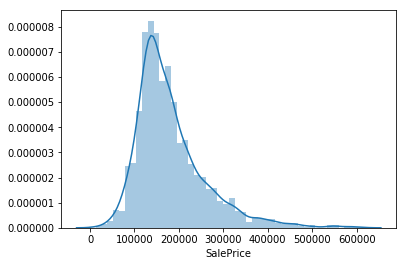

In [19]:
sns.distplot(df_train['SalePrice'], hist=True, kde=True) 
             #bins=int(15), color = 'darkblue', 
             #hist_kws={'edgecolor':'black'},
            # kde_kws={'linewidth': 2})
            
#should log this as there is a skew. 

There are no null values for SalePrice in the training dataset. From the distribution, it looks normally distributed with a slight left skew. We log transform this below.

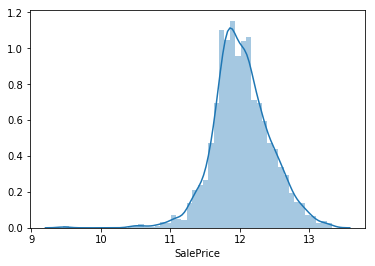

In [20]:
Y_log = np.log1p(df_train['SalePrice'])
graph = sns.distplot(Y_log)

#Even though there is a slight skew, chose not to log the Y variable as it will be difficult to interpret the data variables.

### 1.2 Numerical Variables

We wish to look at the numerical variables (must be type _int_ or _float_ and not nominal or ordinal data)

Next, plot some graphs of relationships between 'SalePrice' (y variable) and other numerical variables.

In [21]:
num_cols

['Lot Area',
 'BsmtFin SF 2',
 'Bsmt Qual',
 'Utilities',
 'Lot Frontage',
 'Garage Cond',
 'Kitchen AbvGr',
 'Garage Cars',
 'Full Bath',
 'Functional',
 'Bedroom AbvGr',
 'TotRms AbvGrd',
 'Garage Qual',
 '2nd Flr SF',
 '1st Flr SF',
 'Exter Cond',
 'BsmtFin SF 1',
 'Exter Qual',
 'Pool QC',
 'Mo Sold',
 'BsmtFin Type 2',
 'Bsmt Half Bath',
 'Pool Area',
 'Bsmt Unf SF',
 'Year Built',
 'Fireplaces',
 'Low Qual Fin SF',
 'Enclosed Porch',
 'Overall Qual',
 'Garage Area',
 'Bsmt Full Bath',
 'Garage Yr Blt',
 'Electrical',
 'BsmtFin Type 1',
 'Wood Deck SF',
 'Kitchen Qual',
 'Fireplace Qu',
 'Paved Drive',
 'Heating QC',
 'Yr Sold',
 'Lot Shape',
 'Open Porch SF',
 'Land Slope',
 'Screen Porch',
 'Garage Finish',
 'Mas Vnr Area',
 'Year Remod/Add',
 'Misc Val',
 'Gr Liv Area',
 'Fence',
 'Bsmt Cond',
 'Total Bsmt SF',
 '3Ssn Porch',
 'Half Bath',
 'Bsmt Exposure',
 'Overall Cond']

In [22]:
df_train[num_cols].describe()

,Lot Area,BsmtFin SF 2,Bsmt Qual,Utilities,Lot Frontage,Garage Cond,Kitchen AbvGr,Garage Cars,Full Bath,Functional,...,Year Remod/Add,Misc Val,Gr Liv Area,Fence,Bsmt Cond,Total Bsmt SF,3Ssn Porch,Half Bath,Bsmt Exposure,Overall Cond
count,2051.000000,2050.000000,2051.000000,2051.000000,1721.000000,2051.000000,2051.000000,2050.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,10065.208191,47.959024,3.490005,3.998537,69.055200,2.810336,1.042906,1.776585,1.577279,7.799610,...,1984.190151,51.574354,1499.330083,0.576792,2.929303,1057.987805,2.591419,0.371039,1.628961,5.562165
std,6742.488909,165.000901,0.901637,0.049365,23.260653,0.716094,0.209790,0.764537,0.549279,0.919873,...,21.036250,573.393985,500.447829,1.213472,0.572009,449.410704,25.229615,0.501043,1.079440,1.104497
min,1300.000000,0.000000,0.000000,2.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1950.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7500.000000,0.000000,3.000000,4.000000,58.000000,3.000000,1.000000,1.000000,1.000000,8.000000,...,1964.500000,0.000000,1129.000000,0.000000,3.000000,793.000000,0.000000,0.000000,1.000000,5.000000
50%,9430.000000,0.000000,4.000000,4.000000,68.000000,3.000000,1.000000,2.000000,2.000000,8.000000,...,1993.000000,0.000000,1444.000000,0.000000,3.000000,994.500000,0.000000,0.000000,1.000000,5.000000
75%,11513.500000,0.000000,4.000000,4.000000,80.000000,3.000000,1.000000,2.000000,2.000000,8.000000,...,2004.000000,0.000000,1728.500000,0.000000,3.000000,1318.750000,0.000000,1.000000,2.000000,6.000000
max,159000.000000,1474.000000,5.000000,4.000000,313.000000,5.000000,3.000000,5.000000,4.000000,8.000000,...,2010.000000,17000.000000,5642.000000,4.000000,5.000000,6110.000000,508.000000,2.000000,4.000000,9.000000


In [23]:
df_test[num_cols].describe()

,Lot Area,BsmtFin SF 2,Bsmt Qual,Utilities,Lot Frontage,Garage Cond,Kitchen AbvGr,Garage Cars,Full Bath,Functional,...,Year Remod/Add,Misc Val,Gr Liv Area,Fence,Bsmt Cond,Total Bsmt SF,3Ssn Porch,Half Bath,Bsmt Exposure,Overall Cond
count,878.000000,878.000000,878.000000,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.00000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,10307.033030,53.896355,3.451025,3.998861,69.545961,2.807517,1.047836,1.742597,1.539863,7.82574,...,1984.417995,48.498861,1496.914579,0.586560,2.907745,1034.357631,2.597950,0.398633,1.627563,5.566059
std,10002.674602,178.632355,0.909468,0.033748,23.533945,0.700603,0.223966,0.750391,0.559060,0.74468,...,20.450725,550.169317,506.468967,1.224476,0.574573,413.446291,24.962482,0.505927,1.065266,1.128903
min,1477.000000,0.000000,0.000000,3.000000,21.000000,0.000000,0.000000,0.000000,0.000000,2.00000,...,1950.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7297.250000,0.000000,3.000000,4.000000,59.000000,3.000000,1.000000,1.000000,1.000000,8.00000,...,1967.000000,0.000000,1114.000000,0.000000,3.000000,789.000000,0.000000,0.000000,1.000000,5.000000
50%,9446.000000,0.000000,3.000000,4.000000,68.000000,3.000000,1.000000,2.000000,2.000000,8.00000,...,1992.000000,0.000000,1436.000000,0.000000,3.000000,975.000000,0.000000,0.000000,1.000000,5.000000
75%,11589.000000,0.000000,4.000000,4.000000,80.000000,3.000000,1.000000,2.000000,2.000000,8.00000,...,2003.000000,0.000000,1779.000000,0.000000,3.000000,1247.000000,0.000000,1.000000,2.000000,6.000000
max,215245.000000,1526.000000,5.000000,4.000000,182.000000,5.000000,3.000000,4.000000,4.000000,8.00000,...,2010.000000,15500.000000,4476.000000,4.000000,4.000000,2630.000000,360.000000,2.000000,4.000000,9.000000


### 1.3 Categorical variables 

Next, we look at the non-numerical variables

In [24]:
#Data cleaning: drop the columns that have more than 80% null values as they will not be helpful: 
#Misc Feature, Alley, Pool QC, Fence

#cat_cols = list(set(cat_cols) - set(['Misc Feature', 'Alley', 'Pool QC', 'Fence']))

In [25]:
for i in list(df_train[cat_cols].columns.values):
    print(i)
    print(df_train[i].unique())
    print('------------------------------------------')

Condition 2
['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
------------------------------------------
Heating
['GasA' 'GasW' 'Grav' 'Wall' 'OthW']
------------------------------------------
Foundation
['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']
------------------------------------------
Land Contour
['Lvl' 'HLS' 'Bnk' 'Low']
------------------------------------------
MS Zoning
['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
------------------------------------------
Neighborhood
['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
------------------------------------------
Misc Feature
[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']
------------------------------------------
Exterior 2nd
['Plywood' 'VinylSd' 'Wd Sdng' 'HdBoard' 'MetalSd' 'AsbShng' 'Cm

In [26]:
for i in list(df_test[cat_cols].columns.values):
    print(i)
    print(df_train[i].unique())
    print('------------------------------------------')

Condition 2
['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
------------------------------------------
Heating
['GasA' 'GasW' 'Grav' 'Wall' 'OthW']
------------------------------------------
Foundation
['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']
------------------------------------------
Land Contour
['Lvl' 'HLS' 'Bnk' 'Low']
------------------------------------------
MS Zoning
['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
------------------------------------------
Neighborhood
['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
------------------------------------------
Misc Feature
[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']
------------------------------------------
Exterior 2nd
['Plywood' 'VinylSd' 'Wd Sdng' 'HdBoard' 'MetalSd' 'AsbShng' 'Cm

# Step 2. Data Cleaning

- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?


### 2.1 Imputing Null Values

Note to self: Always do the same steps for df_train and df_test.

Since Y variable 'SalePrice' does not have null values, we do not have to drop any rows.

In [27]:
df_train['SalePrice'].isnull().sum()

0

Drop variables where there are too many null values (more than 1000 null values before imputing, from the start).

In [28]:
#Before removing
print(df_train.shape)
print(df_test.shape)
list_vars_to_remove = ['Alley', 'Pool QC', 'Fence', 'Misc Feature','Fireplace Qu']

(2051, 81)
(878, 80)


In [29]:
df_test.drop(labels = list_vars_to_remove, axis = 1, inplace = True, errors = 'raise')
df_train.drop(labels = list_vars_to_remove, axis = 1, inplace = True, errors = 'raise')

In [30]:
#After removing
print(df_train.shape)
print(df_test.shape)

(2051, 76)
(878, 75)


In [31]:
print(len(num_cols)) #before
num_cols = list(set(num_cols)- set(['Pool QC', 'Fence', 'Fireplace Qu']))
print(len(num_cols)) #after

56
53


In [32]:
print(len(cat_cols)) #before
cat_cols = list(set(cat_cols)- set(['Alley' , 'Misc Feature']))
print(len(cat_cols)) #after

22
20


##### 2.1.1 Numerical values

In [33]:
num_var_is_null = df_train[num_cols].isnull().sum()
num_var_is_null = num_var_is_null[num_var_is_null>0]
num_var_is_null

BsmtFin SF 2        1
Lot Frontage      330
Garage Cars         1
BsmtFin SF 1        1
Bsmt Half Bath      2
Bsmt Unf SF         1
Garage Area         1
Bsmt Full Bath      2
Garage Yr Blt     114
Mas Vnr Area       22
Total Bsmt SF       1
dtype: int64

Numerical variables where NA means no feature: 'BsmtFin SF 1', 'BsmtFin SF 2', 'Mas Vnr Area', 'Bsmt Full Bath', 'Bsmt Half Bath','Garage Area', 'Total Bsmt SF', 'Garage Cars', 'Bsmt Unf SF'
> To impute NA with 0.


For other variables: 'Lot Frontage', 'Garage Yr Blt'

> To impute with mean.

In [34]:
#Fill numerical NA's with 0:
list_to_impute_zero = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Mas Vnr Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
                       'Garage Area', 'Total Bsmt SF', 
                       'Garage Cars', 'Bsmt Unf SF']

df_train[list_to_impute_zero] = df_train[list_to_impute_zero].fillna(0)
df_test[list_to_impute_zero] = df_test[list_to_impute_zero].fillna(0)

#Fill numerical NA's with the mean of the column:
list_to_impute_mean = ['Lot Frontage', 'Garage Yr Blt']
df_train[list_to_impute_mean] = df_train[list_to_impute_mean].fillna(df_train[list_to_impute_mean].mean())
df_test[list_to_impute_mean] = df_test[list_to_impute_mean].fillna(df_test[list_to_impute_mean].mean())

In [35]:
sum(df_train[num_cols].isnull().sum())

0

##### Categorical values

In [36]:
cat_var_is_null = df_train[cat_cols].isnull().sum()
cat_var_is_null = cat_var_is_null[cat_var_is_null>0]
cat_var_is_null

Garage Type     113
Mas Vnr Type     22
dtype: int64

Categorical variables
> impute np.nan with 'NA' (string)

In [37]:
list_to_impute_NA = ['Garage Type', 'Mas Vnr Type']
df_train[list_to_impute_NA] = df_train[list_to_impute_NA].fillna('NA')
df_test[list_to_impute_NA] = df_test[list_to_impute_NA].fillna('NA')

In [38]:
sum(df_test[num_cols].isnull().sum())

0

#### 2.2 Check for outliers

There are 2 observations in df_train where 'Gr Liv Area' is very large (more than 4000), but 'SalePrice' is low (less than 200000). This is unusual. We will delete these 2 points from df_train.

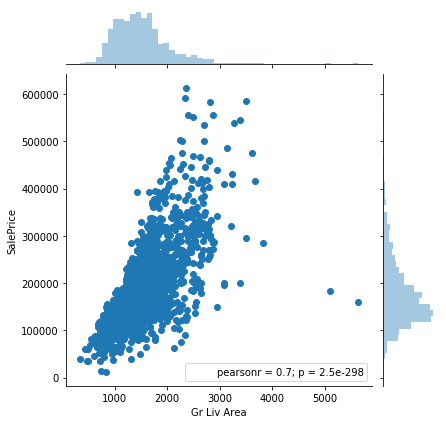

In [39]:
sns.jointplot(df_train['Gr Liv Area'], df_train['SalePrice'])

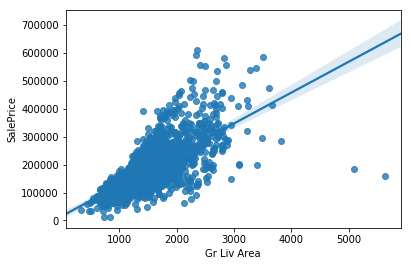

In [40]:
sns.regplot(df_train['Gr Liv Area'], df_train['SalePrice'])

In [41]:
#Before removing
print(df_train.shape)

(2051, 76)


In [42]:
outlier_index = df_train[(df_train['Gr Liv Area'] > 4000) & (df_train['SalePrice'] < 200000)].index

In [43]:
outlier_index

Int64Index([960, 1885], dtype='int64')

In [44]:
df_train.drop(outlier_index, axis=0, inplace=True)

In [45]:
#After removing
print(df_train.shape)

(2049, 76)


#### 2.3 Check for multicollinearity

In [46]:
#sns.pairplot(df_train[num_cols])

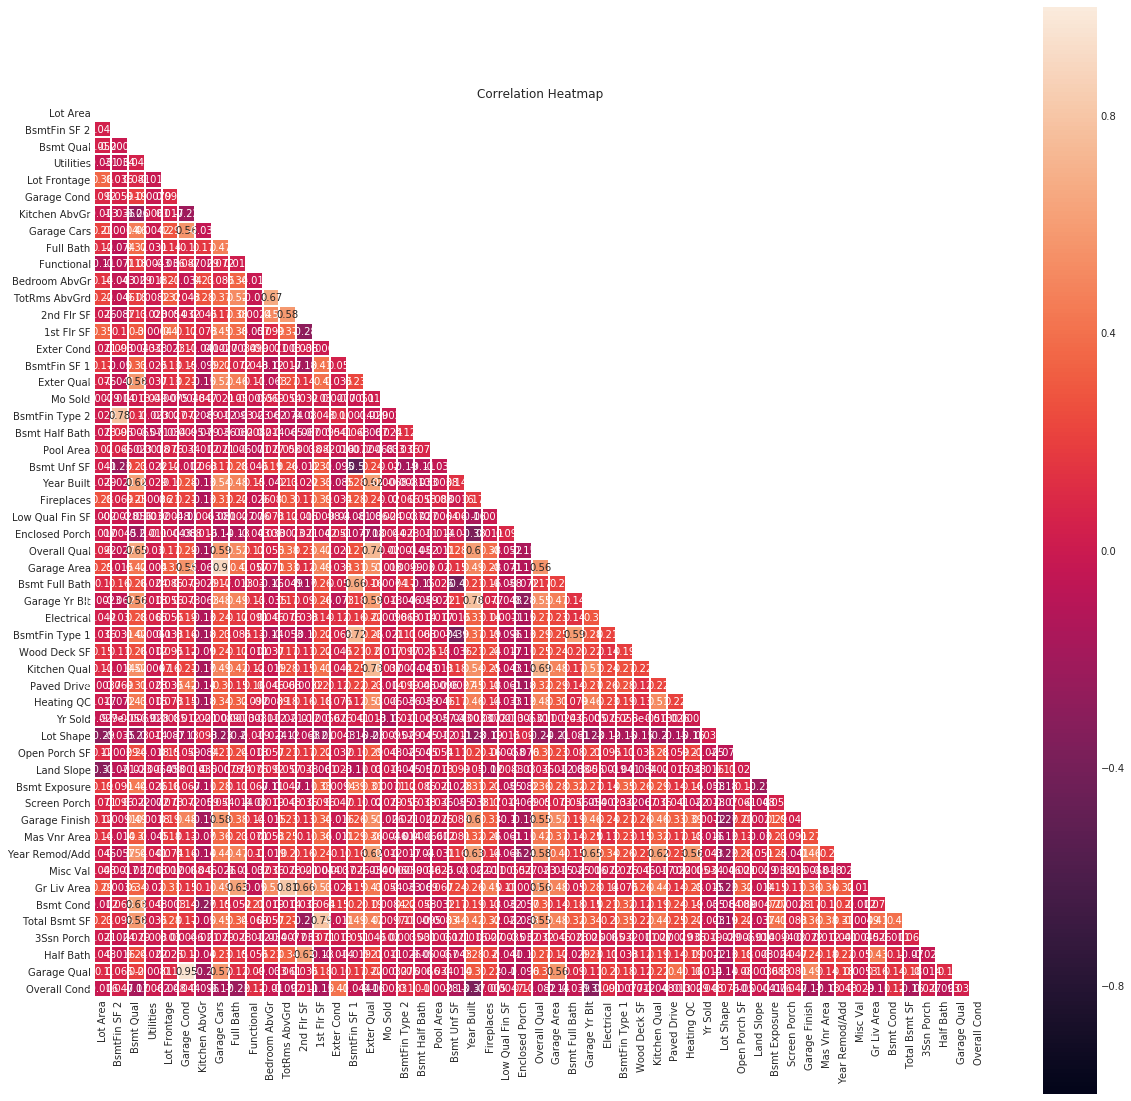

In [47]:
# Check if any variables are directly linearly correlated with other variables and should be dropped.
# Visualise correlation table in a heatmap with masked upper triangle

plt.figure(figsize=(20,20))
mask = np.zeros_like(df_train[num_cols].corr()) 
corr_ = df_train[num_cols].corr()

mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr_, mask = mask, annot = True, square = True, vmin = -1, vmax = 1, 
                linewidths = 1)
title = plt.title('Correlation Heatmap')

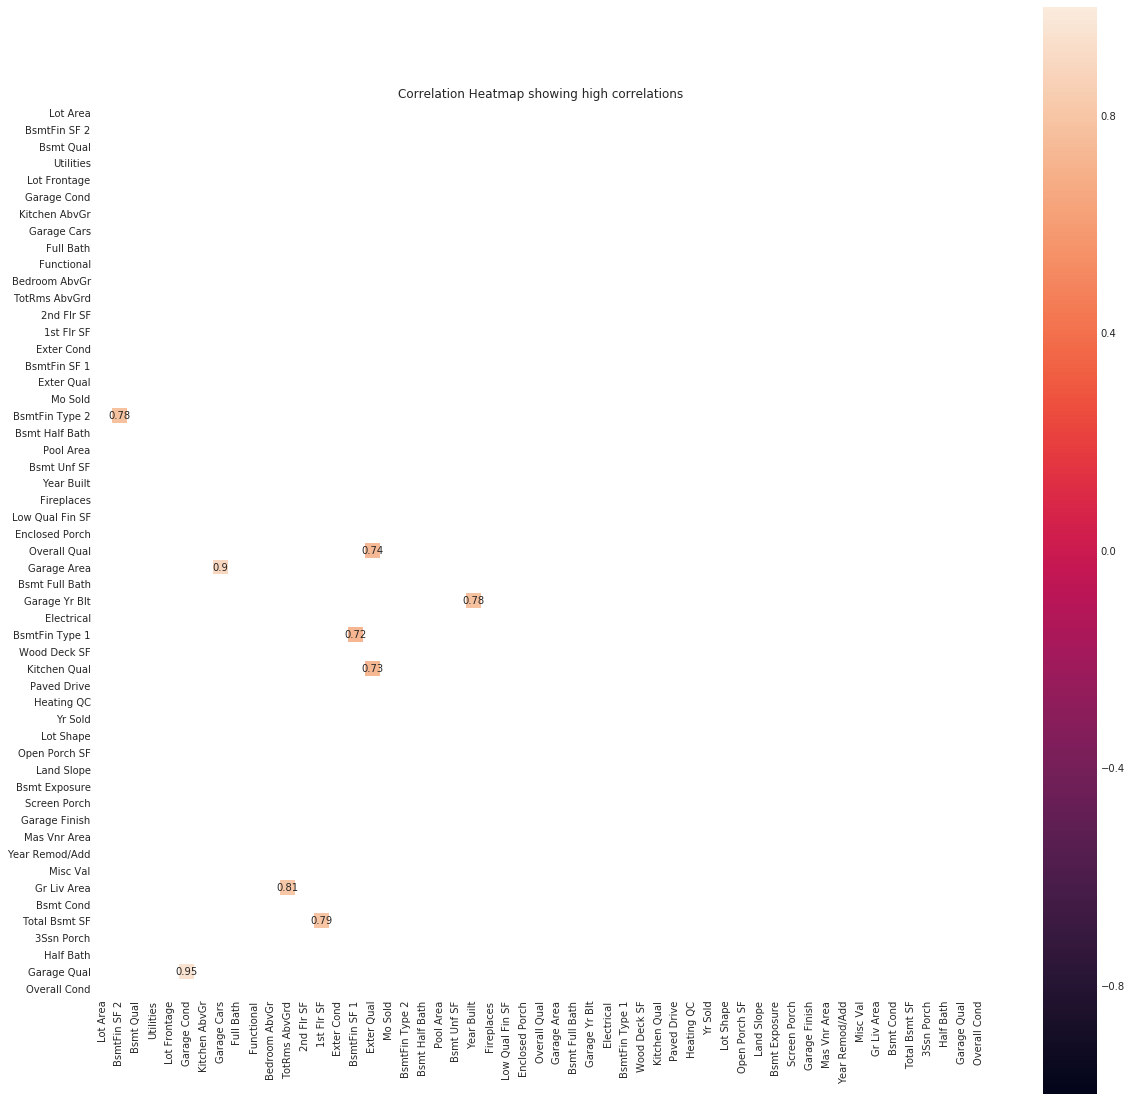

In [48]:
# We want to 'filter' only for those with the highest correlations

plt.figure(figsize=(20,20))
mask = np.zeros_like(df_train[num_cols].corr()) 
corr_ = df_train[num_cols].corr()
high_corr_ = corr_[abs(corr_) >= 0.7]

mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap( high_corr_, mask = mask, annot = True, square = True, vmin = -1, vmax = 1, 
                linewidths = 1)
title = plt.title('Correlation Heatmap showing high correlations')

There is multicollinearity in our training data between the following data

- 'Garage Cars' and 'Garage Area' : Garage Area can be removed as Garage Cars is easier to visualise
- 'Garage Yr Blt' and 'Year Built' : The Garage and house are usually built in the same year, GarageYrBlt can be removed.
- '1st Flr SF' and 'Total Bsmt SF' : The 1st Flr SF and Total Bsmt SF can be combined (with the area of other floors) to form a new variable through feature engineering.
- 'Gr Liv Area' and 'TotRms AbvGrd' : TotRms AbvGrd can be removed as it has a lower correlation to SalePrice

In [49]:
#Before removing
print(df_train.shape)
print(df_test.shape)
list_vars_to_remove = ['Garage Area', 'Garage Yr Blt', 'TotRms AbvGrd']

(2049, 76)
(878, 75)


In [50]:
df_test.drop(labels = list_vars_to_remove, axis = 1, inplace = True, errors = 'raise')
df_train.drop(labels = list_vars_to_remove, axis = 1, inplace = True, errors = 'raise')

In [51]:
#After removing
print(df_train.shape)
print(df_test.shape)

(2049, 73)
(878, 72)


In [52]:
print(len(num_cols)) #before
num_cols = list(set(num_cols)- set(['Garage Area', 'Garage Yr Blt', 'TotRms AbvGrd']))
print(len(num_cols)) #after

53
50


In [53]:
#Before Adding new feature
print(df_train.shape)
print(df_test.shape)

(2049, 73)
(878, 72)


In [54]:
df_train['Total SqFeet'] = df_train['Total Bsmt SF'] + df_train['1st Flr SF'] + df_train['2nd Flr SF']
df_test['Total SqFeet'] = df_test['Total Bsmt SF'] + df_test['1st Flr SF'] + df_test['2nd Flr SF']
df_test.drop(labels = ['Total Bsmt SF', '1st Flr SF', '2nd Flr SF'], axis = 1, inplace = True, errors = 'raise')
df_train.drop(labels = ['Total Bsmt SF', '1st Flr SF', '2nd Flr SF'], axis = 1, inplace = True, errors = 'raise')

In [55]:
print(len(num_cols)) #before
num_cols = list(set(num_cols)- set(['Total Bsmt SF', '1st Flr SF', '2nd Flr SF']))
num_cols.append('Total SqFeet')
print(len(num_cols)) #after

50
48


In [56]:
#After Adding new feature and deleting 3 original features
print(df_train.shape)
print(df_test.shape)

(2049, 71)
(878, 70)


## Step 3. Exploratory Visualisations

In [57]:
top10corr = df_train.corr().SalePrice.sort_values(ascending=False)
top10corr.head(11) #included 11 because #1 is SalePrice for sure.

SalePrice         1.000000
Total SqFeet      0.829925
Overall Qual      0.803462
Gr Liv Area       0.719463
Exter Qual        0.715048
Kitchen Qual      0.694295
Garage Cars       0.648227
Bsmt Qual         0.613236
Year Built        0.572405
Garage Finish     0.558566
Year Remod/Add    0.550872
Name: SalePrice, dtype: float64

In [58]:
neg_corr = df_train.corr().SalePrice.sort_values(ascending=True)
neg_corr.head(13)

Lot Shape         -0.296743
PID               -0.255068
Enclosed Porch    -0.135713
Kitchen AbvGr     -0.125472
Overall Cond      -0.097093
Land Slope        -0.057967
Id                -0.051416
Bsmt Half Bath    -0.045534
Low Qual Fin SF   -0.041608
Yr Sold           -0.015174
Misc Val          -0.010323
BsmtFin Type 2     0.014037
BsmtFin SF 2       0.016398
Name: SalePrice, dtype: float64

The top variables that are correlated with SalePrice are:
1. Total SqFeet : Feature that was just added
2. Overall Qual : Rates the overall material and finish of the house (10 for Very Excellent, and 1 for Very Poor)
3. Gr Liv Area : Above grade (ground) living area square feet
4. Exter Qual
5. Kitchen Qual
6. Garage Cars
7. Bsmt Qual
8. Year Built
9. Year Remod/Add

The variables with negative correlation with SalePrice (excluding PID, MS SubClass and ID as they have no numerical meaning)
- Lot Shape (Ordinal) - General shape of property (score 4 for Regular, 0 for Irregular)
- Enclosed Porch - area in sq feet
- Kitchen AbvGr - Kitchens above grad
- Overall Cond - Rates the overall condition of the house (10 for Very Excellent, and 1 for Very Poor)
- Land Slope
- Bsmt Half Bath
- Low Qual Fin SF
- Yr Sold - Year Sold (YYYY)
- Misc Val

(Intentionally ignore PID and ID as they are identifiers, and MS SubClass as it should be a categorical variable)

Comments: The Overall Cond having such a low correlation with SalePrice is counterintuitive, especially since it is similar in meaning compared with Overall Qual.  

Ordinal data with negative correlation should be because there are a lot of houses missing that feature, as it does not make intuitive sense that a higher rating score for the feature 


#### 3.2 Visualisations for Numerical values

##### 3.2.1 Total SqFeet

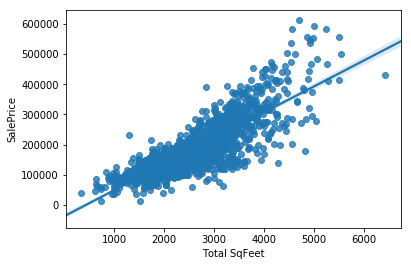

In [59]:
#Plot a graph of Total SqFeet against SalePrice (y variable)
sns.regplot(df_train['Total SqFeet'], df_train['SalePrice'])

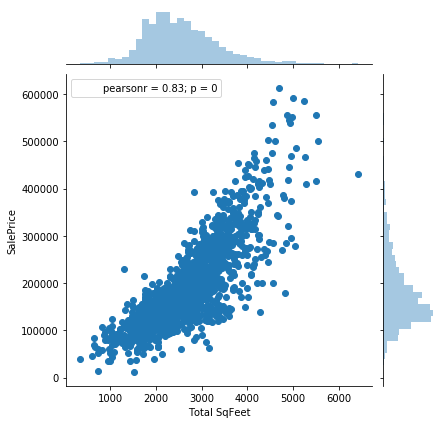

In [60]:
sns.jointplot(df_train['Total SqFeet'], df_train['SalePrice'])

##### 3.2.2 Gr Liv Area

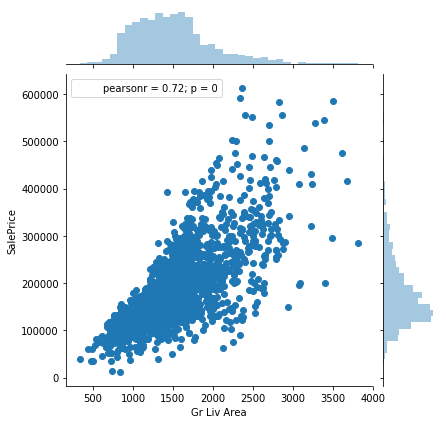

In [61]:
#Plot a graph of Gr Liv Area against SalePrice (y variable)
#sns.regplot(df_train['Gr Liv Area'], df_train['SalePrice'])

sns.jointplot(df_train['Gr Liv Area'], df_train['SalePrice'])

In [62]:
df_train[['Gr Liv Area' , 'Total SqFeet']].corr() #np.corrcoef(df_train['Gr Liv Area'], df_train['Total SqFeet'])

,Gr Liv Area,Total SqFeet
Gr Liv Area,1.000000,0.855667
Total SqFeet,0.855667,1.000000


In [63]:
df_train[['Year Built' , 'Year Remod/Add']].corr()

,Year Built,Year Remod/Add
Year Built,1.000000,0.628613
Year Remod/Add,0.628613,1.000000


In [64]:
#We need to drop 'Gr Liv Area' as the correlation is high
df_test.drop(labels = ['Gr Liv Area'], axis = 1, inplace = True, errors = 'raise')
df_train.drop(labels = ['Gr Liv Area'], axis = 1, inplace = True, errors = 'raise')

##### 3.2.3 Overall Qual

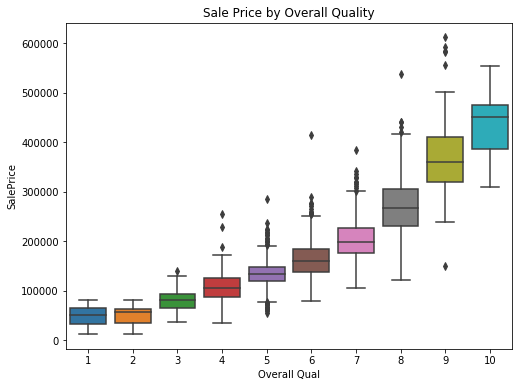

In [65]:
#As Overall Qual is ordinal data, to plot a boxplot instead of scatter plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Overall Qual', y='SalePrice', data= df_train) 
title = plt.title('Sale Price by Overall Quality')

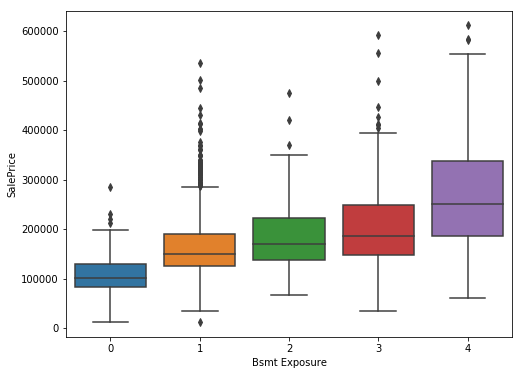

In [66]:
#As Overall Qual is ordinal data, to plot a boxplot instead of scatter plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Bsmt Exposure', y='SalePrice', data= df_train) 


##### 3.2.4 Overall Qual/ Exter Qual/ Kitchen Qual / Bsmt Qual/ Garage Cars

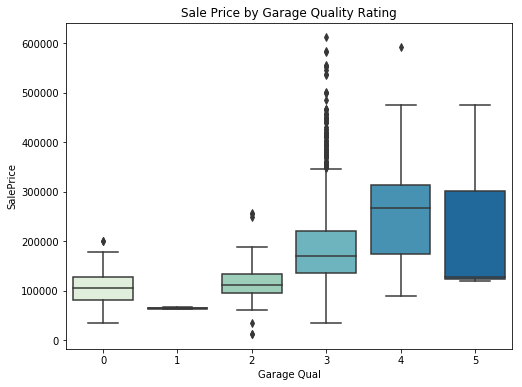

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Garage Qual', y='SalePrice', data= df_train, palette='GnBu')
title = plt.title('Sale Price by Garage Quality Rating')

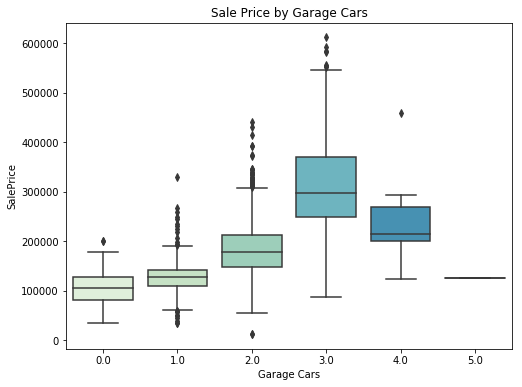

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Garage Cars', y='SalePrice', data= df_train, palette='GnBu')
title = plt.title('Sale Price by Garage Cars')

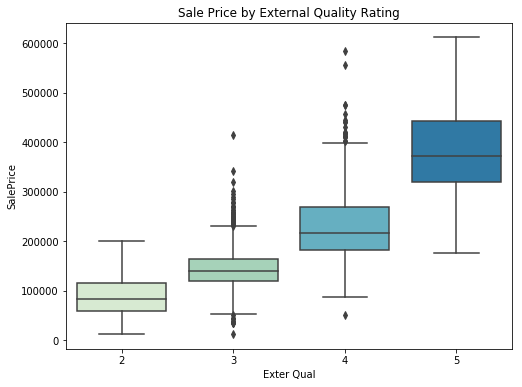

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exter Qual', y='SalePrice', data= df_train, palette='GnBu')
title = plt.title('Sale Price by External Quality Rating')

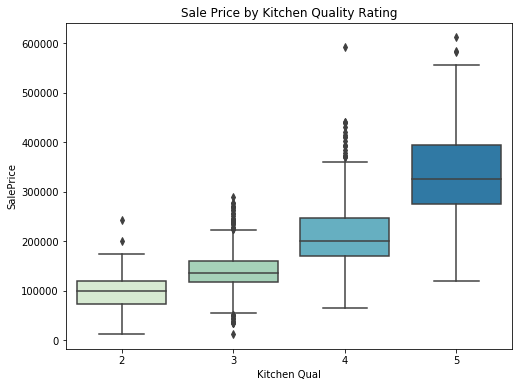

In [70]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Kitchen Qual', y='SalePrice', data= df_train, palette='GnBu')
title = plt.title('Sale Price by Kitchen Quality Rating')

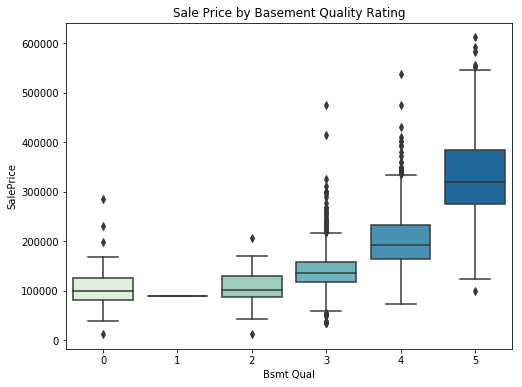

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Bsmt Qual', y='SalePrice', data= df_train, palette='GnBu')
title = plt.title('Sale Price by Basement Quality Rating')

##### 3.4.5 Year Built, Year Remod/Add

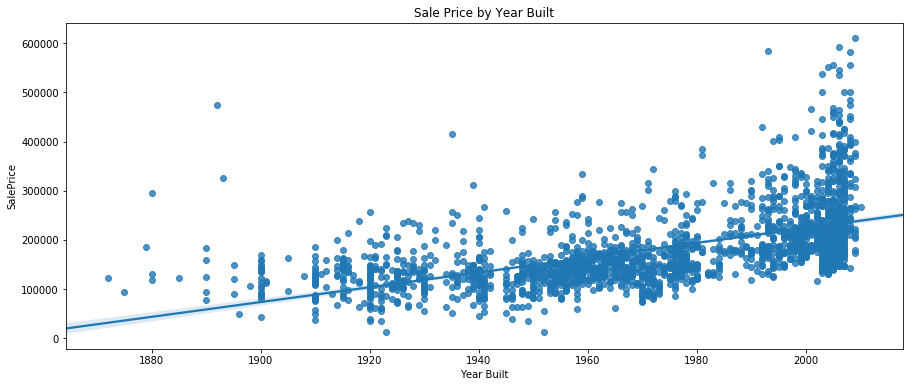

In [72]:
plt.figure(figsize=(15, 6))

sns.regplot(x= df_train['Year Built'], y= df_train['SalePrice'], fit_reg=True);

title = plt.title('Sale Price by Year Built')

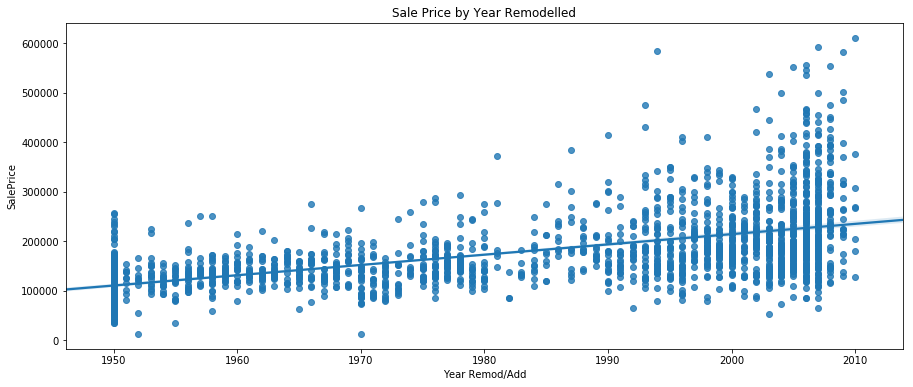

In [73]:
plt.figure(figsize=(15, 6))

sns.regplot(x= df_train['Year Remod/Add'], y= df_train['SalePrice'], fit_reg=True);

title = plt.title('Sale Price by Year Remodelled')


### 3.3 Visualisations for Categorical values

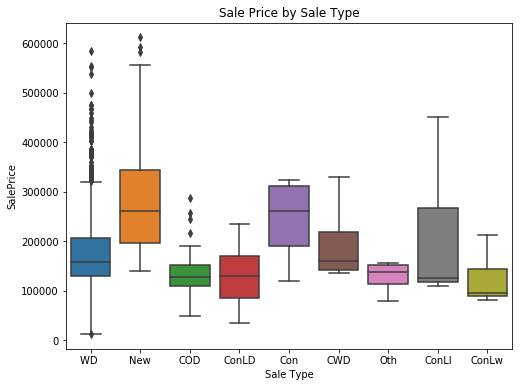

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sale Type', y='SalePrice', data= df_train)
title = plt.title('Sale Price by Sale Type')

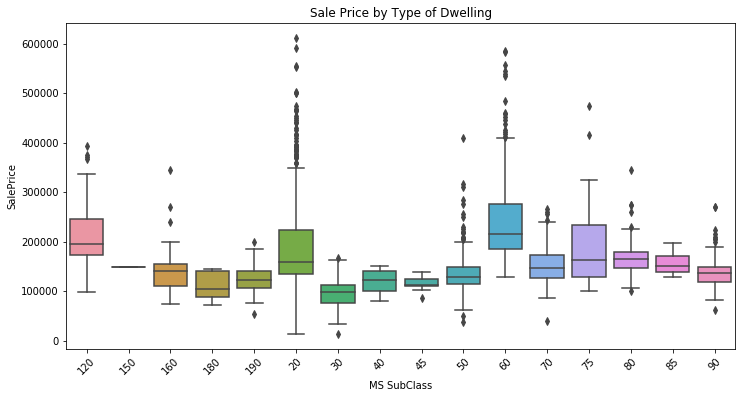

In [75]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MS SubClass', y='SalePrice', data= df_train)
title = plt.title('Sale Price by Type of Dwelling')
tick = plt.xticks(rotation=45)

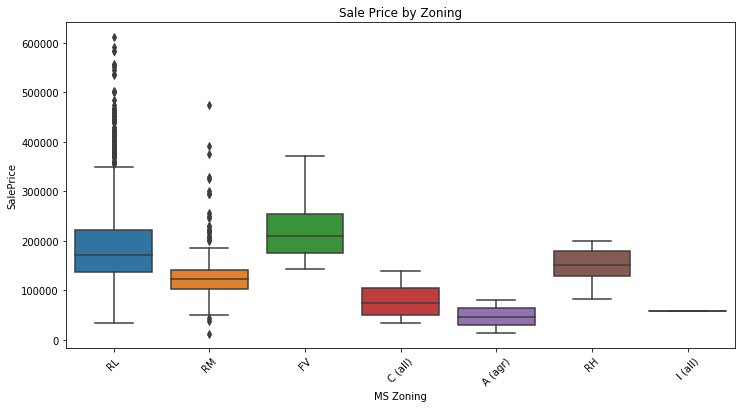

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MS Zoning', y='SalePrice', data= df_train)
title = plt.title('Sale Price by Zoning')
tick = plt.xticks(rotation=45)

Comments: The mean sale prices of FV (Floating Village Residential) is highest, followed by 
Residential Low Density (RL), 
Residential High Density (RH),
Residential Medium Density (RM).

The lowest mean sale prices are from the Agriculture (A) zone.

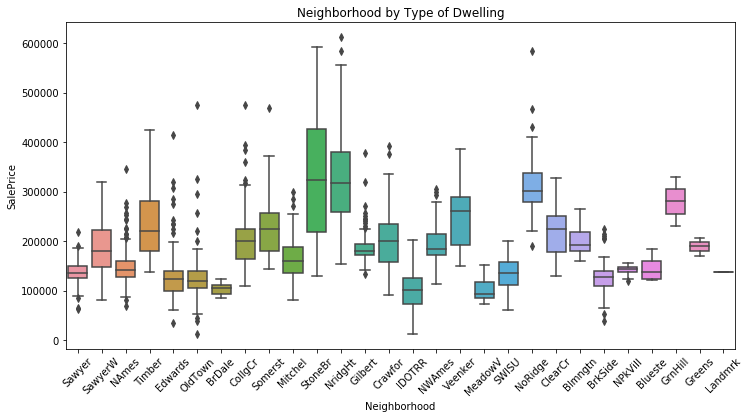

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data= df_train)
title = plt.title('Neighborhood by Type of Dwelling')
tick = plt.xticks(rotation=45)


# Step 4. Pre-processing


- One-hot encode categorical variables.
- Train/test split your data.
- Scale your data.
- Consider using automated feature selection. (skip)

###### Remember to process both df_train and df_test at the same time!

### 4.1 One-hot encoding categorical variables

train dataset

In [78]:
#Before one-hot encoding
df_train.shape

(2049, 70)

In [79]:
df_train_dummies = pd.get_dummies(df_train, drop_first=True)

In [80]:
#After one-hot encoding
df_train_dummies.shape

(2049, 197)

test dataset

In [81]:
#Before one-hot encoding
df_test.shape

(878, 69)

In [82]:
df_test_dummies = pd.get_dummies(df_test, drop_first=True)

In [83]:
#After one-hot encoding
df_test_dummies.shape

(878, 188)

There are some differences in the number of columns in df_test and df_train after one-hot encoding. Rectify it.

In [84]:
train_cols = df_train_dummies.columns
test_cols = df_test_dummies.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

train_not_test

Index(['Condition 2_Feedr', 'Condition 2_PosN', 'Condition 2_RRAe',
       'Condition 2_RRAn', 'Condition 2_RRNn', 'Exterior 1st_CBlock',
       'Exterior 1st_ImStucc', 'Exterior 1st_Stone', 'Exterior 2nd_Stone',
       'Heating_OthW', 'Heating_Wall', 'MS SubClass_150', 'MS Zoning_C (all)',
       'Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'Roof Matl_Membran',
       'SalePrice'],
      dtype='object')

In [85]:
test_not_train = test_cols.difference(train_cols)
test_not_train

Index(['Exterior 1st_PreCast', 'Exterior 2nd_Other', 'Exterior 2nd_PreCast',
       'Heating_GasA', 'Mas Vnr Type_CBlock', 'Roof Matl_Metal',
       'Roof Matl_Roll', 'Sale Type_VWD'],
      dtype='object')

In [86]:
print(len(train_not_test))
print(len(test_not_train))

17
8


In [87]:
#for x in test_not_train:
#    df_train_dummies[x] = 0
    
for y in train_not_test:
    df_test_dummies[y] = 0 #Also created a column of SalePrice = 0 here.

#No point creating a lot of columns of 0 as we will be creating a lot of collinear variables in the train dataset.

In [88]:
#list(test_not_train) #drop this from the df_test_dummies dataset

df_test_dummies.drop(labels = list(test_not_train), axis = 1, inplace = True, errors = 'raise')

In [89]:
print(len(df_train_dummies.columns))
print(len(df_test_dummies.columns))
#Check that there are equal number of columns now
print(len(df_train_dummies.columns) == len(df_test_dummies.columns))

197
197
True


In [90]:
#df_train = df_train_dummies
#df_test = df_test_dummies

### 4.2 Train/Test split

In [123]:
#train-test split data
y_train = df_train_dummies['SalePrice']

X_train = df_train_dummies.drop(labels = 'SalePrice', axis = 1, inplace = False, errors = 'raise')


print(y_train.shape)
print(X_train.shape)

ValueError: labels ['SalePrice'] not contained in axis

In [92]:
df_test_dummies.drop(labels = 'SalePrice', axis = 1, inplace = True, errors = 'ignore')

### 4.3 Scale data using StandardScalar

In [93]:
from sklearn.preprocessing import StandardScaler, RobustScaler

ss = StandardScaler()
rs = RobustScaler()

In [94]:
Xs = ss.fit_transform(X_train)
Xr = rs.fit_transform(X_train)

# Step 5. Modelling

#### 5.1 Fit a Linear Regression model in `statsmodels` predicting `SalePrice`. 

In [95]:
#Import

import statsmodels.api as sm

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score #train_test_split

#from sklearn.metrics import mean_squared_error

C:\Users\gohch\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [96]:
lr = LinearRegression()

lr.fit(X_train, y_train)

#lr.score(X_test, y_test) #cannot score as we are not given y_test

lr_scores = cross_val_score(lr, X_train, y_train, cv= 5) #Use scaled Xs instead of X_train

print (lr_scores)
print (np.mean(lr_scores)) 

[0.8862937  0.91061008 0.91778672 0.9021555  0.9018622 ]
0.9037416386622367


In [97]:
# Remember, we need to add a constant in statsmodels!
X_train = sm.add_constant(X_train)

# Is this relevant to what we are doing?

In [98]:
model_sm = sm.OLS(y_train, X_train).fit()
model_sm.summary() # R square and adjusted R square both give very high values (>0.9)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     127.3
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:05:24   Log-Likelihood:                -23289.
No. Observations:                2049   AIC:                         4.697e+04
Df Residuals:                    1853   BIC:                         4.807e+04
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  8.75e+06   9.49e+06      0.922      0.357   -9.87e+06    2.74e+07
Id                      -7.1575      7.498     -0.955      0.340     -21.863       7.548
PID                   6.427e-06   9.29e-06      0.692      0.489   -1.18e-05    2.46e-05
Lot Frontage           118.9001     36.824      3.229      0.001      46.680     191.120
Lot Area                 0.6458      0.109      5.940      0.000       0.433       0.859
Lot Shape             1279.6198   1091.462      1.172      0.241    -861.005    3420.245
Utilities             2.602e+04    1.3e+04      1.995      0.046     441.975    5.16e+04
Land Slope            2687.1883   2786.523      0.964      0.335   -2777.865    8152.242
Overall Qual          7770.0012    788.818      9.850      0.000    6222.935    9317.067
Overall Cond          5358.5353    673.240      7.959      0.000    4038.147    6678.924
Year Built             330.9799     63.400      5.220      0.000     206.636     455.323
Year Remod/Add          31.0611     43.485      0.714      0.475     -54.223     116.345
Mas Vnr Area            36.8157      4.756      7.742      0.000      27.489      46.142
Exter Qual            8450.1686   1659.513      5.092      0.000    5195.458    1.17e+04
Exter Cond           -1697.2344   1602.300     -1.059      0.290   -4839.738    1445.269
Bsmt Qual             2270.6807   1279.392      1.775      0.076    -238.520    4779.881
Bsmt Cond            -3720.6510   1545.619     -2.407      0.016   -6751.988    -689.314
Bsmt Exposure         4024.4886    666.853      6.035      0.000    2716.627    5332.350
BsmtFin Type 1        -289.2130    403.203     -0.717      0.473   -1079.993     501.567
BsmtFin SF 1           -19.0001      5.076     -3.743      0.000     -28.956      -9.044
BsmtFin Type 2         519.2810    903.354      0.575      0.565   -1252.417    2290.979
BsmtFin SF 2           -34.6236      7.034     -4.922      0.000     -48.420     -20.828
Bsmt Unf SF            -41.5073      4.782     -8.680      0.000     -50.886     -32.128
Heating QC            1336.9771    744.389      1.796      0.073    -122.952    2796.906
Electrical           -1661.8407   1504.432     -1.105      0.269   -4612.401    1288.720
Low Qual Fin SF         37.3524     11.448      3.263      0.001      14.901      59.804
Bsmt Full Bath        3076.0038   1500.454      2.050      0.041     133.245    6018.763
Bsmt Half Bath         858.1988   2243.595      0.383      0.702   -3542.041    5258.439
Full Bath             1171.2193   1652.001      0.709      0.478   -2068.759    4411.197
Half Bath             2565.3999   1605.639      1.598      0.110    -583.652    5714.452
Bedroom AbvGr        -3439.9595    958.057     -3.591      0.000   -5318.945   -1560.974
Kitchen AbvGr        -6786.3726   5002.128     -1.357    

In [99]:
model_sm = sm.OLS(y_train, Xs).fit()
model_sm.summary() #This R squared is so low
#X contains an outlier that causes the standard scaler to be so low compared to the one that is not scaled thru ss.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1.666
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.21e-07
Time:                        21:05:24   Log-Likelihood:                -27732.
No. Observations:                2049   AIC:                         5.585e+04
Df Residuals:                    1854   BIC:                         5.695e+04
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -6041.2398   5.53e+04     -0.109      0.913   -1.15e+05    1.02e+05
x2          1212.4181   1.53e+04      0.079      0.937   -2.88e+04    3.13e+04
x3          2446.6330   6622.841      0.369      0.712   -1.05e+04    1.54e+04
x4          4266.5574   6277.703      0.680      0.497   -8045.552    1.66e+04
x5           721.1777   5376.514      0.134      0.893   -9823.481    1.13e+04
x6          1284.8584   5628.780      0.228      0.819   -9754.555    1.23e+04
x7           656.5286   5950.436      0.110      0.912    -1.1e+04    1.23e+04
x8          1.104e+04   9800.182      1.127      0.260   -8176.016    3.03e+04
x9          5919.1826   6500.042      0.911      0.363   -6828.989    1.87e+04
x10         9983.6553   1.67e+04      0.597      0.550   -2.28e+04    4.28e+04
x11          653.1420   7992.035      0.082      0.935    -1.5e+04    1.63e+04
x12         6328.4191   7144.818      0.886      0.376   -7684.316    2.03e+04
x13         4951.7230   8499.674      0.583      0.560   -1.17e+04    2.16e+04
x14         -632.8542   5221.995     -0.121      0.904   -1.09e+04    9608.755
x15         2045.0222   1.01e+04      0.203      0.839   -1.77e+04    2.18e+04
x16        -2128.7502   7729.277     -0.275      0.783   -1.73e+04     1.3e+04
x17         4335.0038   6278.261      0.690      0.490   -7978.201    1.66e+04
x18         -614.5045   7487.931     -0.082      0.935   -1.53e+04    1.41e+04
x19        -8355.0268   1.95e+04     -0.428      0.669   -4.66e+04    2.99e+04
x20          493.1947   7499.018      0.066      0.948   -1.42e+04    1.52e+04
x21        -5712.7999   1.01e+04     -0.563      0.573   -2.56e+04    1.42e+04
x22        -1.847e+04   1.86e+04     -0.993      0.321   -5.49e+04     1.8e+04
x23         1288.8309   6271.949      0.205      0.837    -1.1e+04    1.36e+04
x24         -668.9886   5293.376     -0.126      0.899   -1.11e+04    9712.615
x25         1908.0006   5110.946      0.373      0.709   -8115.813    1.19e+04
x26         1603.8447   6837.998      0.235      0.815   -1.18e+04     1.5e+04
x27          215.2321   4918.067      0.044      0.965   -9430.300    9860.764
x28          643.2975   7930.756      0.081      0.935   -1.49e+04    1.62e+04
x29         1284.6988   7027.890      0.183      0.855   -1.25e+04    1.51e+04
x30        -2843.4799   6921.800     -0.411      0.681   -1.64e+04    1.07e+04
x31        -1424.0315   9174.183     -0.155      0.877   -1.94e+04    1.66e+04
x32         4341.5690   7434.544      0.584      0.559   -1.02e+04    1.89e+04
x33         3794.2392   5082.294      0.747      0.455   -6173.382    1.38e+04
x34         1398.9211   5935.173      0.236      0.814   -1.02e+04     1.3e+04
x35          433.1554   7371.699      0.059      0.953    -1.4e+04    1.49e+04
x36         4645.0128   8303.469      0.559      0.576   -1.16e+04    2.09e+04
x3

In [100]:
model_sm = sm.OLS(y_train, Xr).fit()
model_sm.summary() #This R squared is very close to 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     797.6
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:05:25   Log-Likelihood:                -23347.
No. Observations:                2049   AIC:                         4.708e+04
Df Residuals:                    1854   BIC:                         4.818e+04
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.216e+04   1.09e+04     -2.940      0.003   -5.36e+04   -1.07e+04
x2          5968.0700   3600.926      1.657      0.098   -1094.225     1.3e+04
x3          2268.2891    681.540      3.328      0.001     931.623    3604.955
x4          2290.2992    446.257      5.132      0.000    1415.081    3165.517
x5          1364.8688   1122.441      1.216      0.224    -836.512    3566.250
x6          2.542e+04   1.34e+04      1.895      0.058    -887.298    5.17e+04
x7          2736.0624   2865.689      0.955      0.340   -2884.253    8356.378
x8          1.454e+04   1619.423      8.977      0.000    1.14e+04    1.77e+04
x9          5261.6247    692.301      7.600      0.000    3903.853    6619.397
x10         1.636e+04   3129.326      5.228      0.000    1.02e+04    2.25e+04
x11          837.8606   1788.356      0.469      0.639   -2669.542    4345.263
x12         5087.4639    769.337      6.613      0.000    3578.605    6596.323
x13         9693.4173   1702.216      5.695      0.000    6354.956     1.3e+04
x14        -1728.5236   1647.822     -1.049      0.294   -4960.305    1503.257
x15         1172.3851   1311.238      0.894      0.371   -1399.274    3744.044
x16        -4259.1677   1588.638     -2.681      0.007   -7374.874   -1143.461
x17         4340.6315    685.084      6.336      0.000    2997.014    5684.249
x18        -1785.0427   2073.022     -0.861      0.389   -5850.745    2280.660
x19        -1.144e+04   3818.759     -2.997      0.003   -1.89e+04   -3954.915
x20          583.7247    928.998      0.628      0.530   -1238.266    2405.716
x21          -32.2034      7.230     -4.454      0.000     -46.384     -18.023
x22        -2.175e+04   2893.439     -7.516      0.000   -2.74e+04   -1.61e+04
x23         1983.7559   1529.550      1.297      0.195   -1016.065    4983.577
x24        -1770.4397   1547.139     -1.144      0.253   -4804.757    1263.877
x25           36.9800     11.773      3.141      0.002      13.891      60.069
x26         3699.9543   1541.847      2.400      0.017     676.015    6723.894
x27         1549.5719   2306.324      0.672      0.502   -2973.693    6072.837
x28          532.5781   1697.759      0.314      0.754   -2797.143    3862.299
x29         2843.6022   1651.028      1.722      0.085    -394.468    6081.672
x30        -3898.3909    984.231     -3.961      0.000   -5828.708   -1968.073
x31        -5537.6073   5142.761     -1.077      0.282   -1.56e+04    4548.603
x32         7216.3577   1315.450      5.486      0.000    4636.438    9796.277
x33         4335.7826    649.600      6.675      0.000    3061.758    5609.807
x34         1929.4652   1098.239      1.757      0.079    -224.450    4083.381
x35          531.3624    965.552      0.550      0.582   -1362.322    2425.047
x36         5563.2849   1276.054      4.360      0.000    3060.632    8065.938
x3

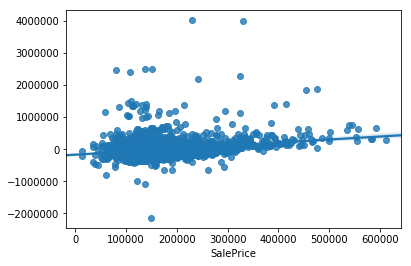

In [101]:
sns.regplot(y_train, model_sm.predict(Xs))

Interatively remove columns where p is large

In [102]:
to_remove = ['House Style_SLvl',
'MS Zoning_FV',
'Neighborhood_IDOTRR',
'Exterior 2nd_Plywood',
'Exterior 1st_MetalSd',
'Condition 2_RRNn',
'Exterior 1st_WdShing',
'Exterior 2nd_CmentBd',
'Condition 1_RRAn',
'BsmtFin Type 1',
'Year Remod/Add',
'Full Bath',
'House Style_1Story',
'PID',
'Neighborhood_BrkSide',
'Condition 2_Norm',
'Sale Type_ConLI',
'Exterior 1st_AsphShn',
'MS Zoning_RL',
'Exterior 2nd_Stucco',
'Foundation_PConc',
'Neighborhood_Somerst',
'Exterior 2nd_HdBoard',
'Condition 2_RRAn',
'Roof Style_Gambrel',
'Exterior 1st_CBlock',
'Exterior 2nd_Wd Shng',
'Condition 2_Feedr',
'Foundation_CBlock',
'BsmtFin Type 2',
'Condition 1_RRAe',
'MS SubClass_180',
'Roof Style_Shed',
'Land Contour_Lvl',
'Heating_Wall',
'Bldg Type_TwnhsE',
'Garage Finish',
'Foundation_Stone',
'Condition 2_RRAe',
'MS SubClass_190',
'Street_Pave',
'Exterior 2nd_ImStucc',
'Condition 1_RRNe',
'Enclosed Porch',
'House Style_2.5Fin',
'Roof Matl_WdShake',
'Roof Matl_Tar&Grv',
'Bsmt Half Bath',
'Neighborhood_NPkVill',
'Foundation_Wood',
'Roof Style_Hip',
'MS Zoning_RM',
'House Style_2.5Unf',
'Neighborhood_MeadowV',
'Neighborhood_Greens',
'Land Contour_Low',
'Condition 1_RRNn',
'House Style_1.5Unf',
'MS SubClass_160',
'3Ssn Porch',
'Condition 2_PosN',
'Exterior 2nd_CBlock',
'Exterior 2nd_BrkFace',
'Lot Config_FR2',
'Sale Type_ConLw',
'Pool Area',
'Neighborhood_Crawfor',
'House Style_SFoyer',
'Roof Style_Gable',
'Exterior 2nd_Stone',
'MS Zoning_C (all)',
'Bldg Type_Twnhs',
'Garage Cond',
'Neighborhood_Landmrk',
'House Style_2Story',
'Exterior 2nd_MetalSd',
'Neighborhood_Blueste',
'Exterior 1st_Stone',
'Misc Val',
'Mo Sold',
'MS Zoning_I (all)',
'Heating_GasW',
'Exter Cond',
'Lot Shape',
'Exterior 1st_ImStucc',
'Exterior 1st_Stucco',
'Neighborhood_Mitchel',
'Electrical',
'Garage Type_CarPort',
'Neighborhood_Sawyer',
'Neighborhood_BrDale',
'MS Zoning_RH',
'Half Bath',
'Paved Drive',
'Neighborhood_ClearCr',
'Neighborhood_SWISU',
'Open Porch SF',
'Exterior 2nd_Wd Sdng',
'Kitchen AbvGr',
'Exterior 2nd_AsphShn',
'Land Slope',
'Heating_Grav',
'Central Air_Y',
'Lot Config_FR3',
'Garage Type_Attchd',
'Garage Type_Basment',
'Utilities',
'Neighborhood_Timber',
'Condition 1_Feedr',
'Sale Type_Oth',
'Lot Config_Inside',
'Exterior 1st_BrkComm',
'Neighborhood_Veenker',
'Roof Matl_Membran',
'Exterior 2nd_Brk Cmn',
'Sale Type_WD',
'Bsmt Full Bath',
'Sale Type_WD',
'Exterior 1st_Plywood']

In [103]:
#df_test.drop(labels = list_vars_to_remove, axis = 1, inplace = True, errors = 'raise')
X_train_sub = X_train.drop(labels = to_remove, axis = 1, errors = 'ignore')
#X_test_sub = X_test.drop(labels = to_remove, axis = 1, errors = 'raise')

X_train_sub.head()

,const,Id,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Mas Vnr Area,Exter Qual,Bsmt Qual,...,Foundation_Slab,Heating_OthW,Garage Type_BuiltIn,Garage Type_Detchd,Garage Type_NA,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_New,Sale Type_WD
0,1.0,109,69.0552,13517,6,8,1976,289.0,4,3,...,0,0,0,0,0,0,0,0,0,1
1,1.0,544,43.0000,11492,7,5,1996,132.0,4,4,...,0,0,0,0,0,0,0,0,0,1
2,1.0,153,68.0000,7922,5,7,1953,0.0,3,3,...,0,0,0,1,0,0,0,0,0,1
3,1.0,318,73.0000,9802,5,5,2006,0.0,3,4,...,0,0,1,0,0,0,0,0,0,1
4,1.0,255,82.0000,14235,6,8,1900,0.0,3,2,...,0,0,0,1,0,0,0,0,0,1


In [104]:
Xs_new = ss.fit_transform(X_train_sub)
Xr_new = rs.fit_transform(X_train_sub)

In [105]:
lr.fit(X_train_sub, y_train)
lr_scores = cross_val_score(lr, X_train_sub, y_train, cv= 5) #Use scaled Xs instead of X_train

print (lr_scores)
print (np.mean(lr_scores))

[0.89280463 0.9192294  0.9288868  0.91646401 0.90862248]
0.9132014631639496


In [106]:
X_train_sub = sm.add_constant(X_train_sub)
model_sm = sm.OLS(y_train, X_train_sub).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     311.9
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:05:26   Log-Likelihood:                -23367.
No. Observations:                2049   AIC:                         4.689e+04
Df Residuals:                    1970   BIC:                         4.734e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.792e+07    5.4e+06      3.320      0.001    7.34e+06    2.85e+07
Id                     -14.6179      4.232     -3.455      0.001     -22.917      -6.319
Lot Frontage            95.0660     33.540      2.834      0.005      29.288     160.844
Lot Area                 0.5615      0.093      6.016      0.000       0.378       0.745
Overall Qual          8261.9457    729.813     11.321      0.000    6830.660    9693.232
Overall Cond          5171.2506    560.253      9.230      0.000    4072.501    6270.001
Year Built             361.9918     50.054      7.232      0.000     263.827     460.156
Mas Vnr Area            38.5227      4.493      8.573      0.000      29.710      47.335
Exter Qual            9529.8250   1569.874      6.070      0.000    6451.036    1.26e+04
Bsmt Qual             3220.7243   1207.866      2.666      0.008     851.894    5589.554
Bsmt Cond            -4689.1622   1449.596     -3.235      0.001   -7532.065   -1846.259
Bsmt Exposure         3543.9872    609.933      5.810      0.000    2347.805    4740.170
BsmtFin SF 1           -17.0737      3.971     -4.300      0.000     -24.861      -9.286
BsmtFin SF 2           -30.4843      5.014     -6.080      0.000     -40.317     -20.652
Bsmt Unf SF            -40.7742      3.891    -10.478      0.000     -48.406     -33.142
Heating QC            1564.4398    684.685      2.285      0.022     221.658    2907.222
Low Qual Fin SF         37.5109     10.268      3.653      0.000      17.374      57.648
Bedroom AbvGr        -3830.3886    878.948     -4.358      0.000   -5554.154   -2106.624
Kitchen Qual          6539.6812   1213.780      5.388      0.000    4159.254    8920.109
Functional            4005.6081    582.438      6.877      0.000    2863.350    5147.866
Fireplaces            2680.9868   1002.468      2.674      0.008     714.978    4646.996
Garage Cars           6206.3205   1134.808      5.469      0.000    3980.769    8431.872
Garage Qual           5226.7606   2163.833      2.416      0.016     983.119    9470.403
Wood Deck SF            13.2199      4.336      3.049      0.002       4.715      21.724
Screen Porch            64.0260      9.102      7.035      0.000      46.176      81.876
Yr Sold              -9370.8207   2682.092     -3.494      0.000   -1.46e+04   -4110.785
Total SqFeet            56.8759      2.365     24.050      0.000      52.238      61.514
MS SubClass_150      -4.574e+04   2.28e+04     -2.007      0.045   -9.04e+04   -1045.314
MS SubClass_20        2.636e+04   2396.961     10.997      0.000    2.17e+04    3.11e+04
MS SubClass_30        3.552e+04   3822.466      9.292      0.000     2.8e+04     4.3e+04
MS SubClass_40         3.25e+04   1.16e+04      2.808      0.005    9800.878    5.52e+04
MS SubClass_45        3.421e+04   7272.891      4.704    

In [107]:
model_sm = sm.OLS(y_train, Xr_new).fit()
model_sm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     836.2
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:05:26   Log-Likelihood:                -24282.
No. Observations:                2049   AIC:                         4.872e+04
Df Residuals:                    1971   BIC:                         4.916e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.471e-09   2.41e-10    -10.271      0.000   -2.94e-09      -2e-09
x1         -8.103e+04   9400.254     -8.619      0.000   -9.95e+04   -6.26e+04
x2         -6662.7684    911.048     -7.313      0.000   -8449.486   -4876.050
x3           975.1429    582.351      1.674      0.094    -166.945    2117.231
x4          1.169e+04   2276.755      5.136      0.000    7227.180    1.62e+04
x5          7822.7226    872.128      8.970      0.000    6112.333    9533.112
x6          3.826e+04   3704.649     10.327      0.000     3.1e+04    4.55e+04
x7          6145.3074   1109.532      5.539      0.000    3969.328    8321.287
x8          2.081e+04   2431.074      8.561      0.000     1.6e+04    2.56e+04
x9         -1.078e+04   1842.600     -5.848      0.000   -1.44e+04   -7161.412
x10        -3626.8433   2265.266     -1.601      0.110   -8069.410     815.724
x11         5731.1703    951.068      6.026      0.000    3865.966    7596.374
x12         1.251e+04   4489.265      2.786      0.005    3701.824    2.13e+04
x13           10.5616      7.742      1.364      0.173      -4.623      25.746
x14        -3766.0020   3544.559     -1.062      0.288   -1.07e+04    3185.475
x15        -1.872e+04   2042.028     -9.170      0.000   -2.27e+04   -1.47e+04
x16           60.6745     16.032      3.785      0.000      29.233      92.117
x17         -1.11e+04   1357.036     -8.179      0.000   -1.38e+04   -8437.268
x18         1.762e+04   1868.957      9.426      0.000     1.4e+04    2.13e+04
x19          790.5955    905.365      0.873      0.383    -984.977    2566.168
x20        -3032.0308   1557.721     -1.946      0.052   -6086.983      22.922
x21        -1213.4091   1760.139     -0.689      0.491   -4665.337    2238.519
x22         5288.8917   3381.713      1.564      0.118   -1343.217    1.19e+04
x23         7742.8930   1127.009      6.870      0.000    5532.638    9953.148
x24          101.4779     14.182      7.155      0.000      73.665     129.291
x25         -7.25e+04   8233.954     -8.806      0.000   -8.87e+04   -5.64e+04
x26         4.384e+04   3630.080     12.077      0.000    3.67e+04     5.1e+04
x27        -1.175e+04   3.56e+04     -0.330      0.741   -8.16e+04    5.81e+04
x28         9.133e+04   3226.117     28.309      0.000     8.5e+04    9.77e+04
x29         1.117e+05   5541.018     20.159      0.000    1.01e+05    1.23e+05
x30         9.085e+04    1.8e+04      5.046      0.000    5.55e+04    1.26e+05
x31           1.1e+05   1.11e+04      9.866      0.000    8.81e+04    1.32e+05
x32         1.165e+05   4344.627     26.823      0.000    1.08e+05    1.25e+05
x33         1.041e+05   3498.625     29.757      0.000    9.72e+04    1.11e+05
x34         1.344e+05   5832.428     23.040      0.000    1.23e+05    1.46e+05
x35         1.559e+05   1.04e+04     14.969      0.000    1.35e+05    1.76e+05
x3

In [108]:
lr = LinearRegression()

lr.fit(Xr, y_train)

#lr.score(X_test, y_test) #cannot score as we are not given y_test

lr_scores = cross_val_score(lr, Xr, y_train, cv= 5) #Use scaled Xs instead of X_train

print (lr_scores)
print (np.mean(lr_scores)) 

[0.8862937  0.91061008 0.91778672 0.90215549 0.9018622 ]
0.903741639139468


### 5.1 Ridge Regression

#### Find an optimal value for Ridge regression alpha using `RidgeCV`.

In [109]:
%%time
ridge_alphas = np.logspace(0, 5, 200) # Ridge performs best searching alphas through logarithmic space instead of linear space

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xr, y_train)

print(optimal_ridge.alpha_)

2.5235391704347663
Wall time: 46 s


#### Cross-validate the Ridge regression $R^2$ with the optimal alpha. Is it better than the Linear regression? If so, why might this be?

In [110]:
#Using Robust Scaler
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xr, y_train, cv=10)

print (ridge_scores)
print (np.mean(ridge_scores))

[0.88890461 0.89738511 0.9006088  0.93113477 0.93204219 0.9188856
 0.91148929 0.90936734 0.89704517 0.92134726]
0.9108210147069574


### 5.2 Lasso Regression

In [111]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xr, y_train)

print (optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

643.9762537706617


.........................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.8s finished


Cross-validate the Lasso $R^2$ with the optimal alpha.

Is it better than the Linear regression? Is it better than Ridge? What do the differences in results imply about the issues with the dataset?

In [112]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xr, y_train, cv=10)

print (lasso_scores)
print (np.mean(lasso_scores))

[0.84748677 0.88473414 0.86984121 0.91301507 0.9037127  0.90272989
 0.91158125 0.89119948 0.88240201 0.89691115]
0.8903613670868917


coefficients for variables in the Lasso.

1. Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
2. What percent of the variables in the original dataset are "zeroed-out" by the lasso?
3. What are the most important predictors for how many shots Kobe made in a game?

> **Note:** if you only fit the Lasso within `cross_val_score`, you will have to refit it outside of that
function to pull out the coefficients.

#### Look at the coefficients for variables in the Lasso.

In [113]:
lasso.fit(Xr, y_train)

Lasso(alpha=643.9762537706617, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [114]:
lasso.fit(Xs, y_train)

Lasso(alpha=643.9762537706617, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [116]:
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)}) #troubleshoot error

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head()

ValueError: arrays must all be same length

In [124]:
print ('Number variables zeroed out:', np.sum((lasso.coef_ == 0)))
print ('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X_train.shape[0]))

Number variables zeroed out: 110
Percent variables zeroed out: 0.053684724255734506


In [130]:
X_test = df_test_dummies

In [132]:
lr = LinearRegression()

lr.fit(Xr, y_train)
predictions = lr.predict(X_test)
output = pd.DataFrame({'Id': df_test['Id'], 'Sale Price': predictions})
output.to_csv('submission.csv', index=False)

Comment on performance:
    
We choose linear regression with Robust Scaler standardisation (without regularisation) because it has a higher R2.


# Step 6. Inferential Visualizations

- Look at feature loadings.
- Look at how accurate your predictions are.
- Is there a pattern to your errors? Consider reworking your model to address this.

##### Compare the residuals for the Ridge and Lasso visually.

In [ ]:
# Need to fit the ElasticNet and Ridge outside of cross_val_score like i did with the ridge
ridge.fit(Xs, y_train)
lasso.fit(Xs, y_train)

In [ ]:
# model residuals:

ridge_resid = y_train - ridge.predict(Xs)
lasso_resid = y_train - lasso.predict(Xs)

In [ ]:
sns.jointplot(ridge_resid, lasso_resid)

# Step 7. Conclusions and Recommendations

- Which features appear to add the most value to a home?
- Which features hurt the value of a home the most?
- What are things that homeowners could improve in their homes to increase the value?
- What neighborhoods seem like they might be a good investment?
- Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?

Top 10 significant variables with positive coefficients:

- Neighborhood_GrnHill
- Neighborhood_StoneBr
- MS SubClass_30
- MS SubClass_45
- MS SubClass_75
- Garage Type_NA
- Exter Qual
- Overall Qual
- Kitchen Qual
- Garage Cars

Top 10 most significant variables with negative coefficients:

- Roof Style_Mansard
- Neighborhood_NWAmes
- Neighborhood_Gilbert
- Neighborhood_SawyerW
- Yr Sold
- Neighborhood_OldTown
- Neighborhood_NAmes
- Bedroom AbvGr
- Limitations

#### Limitations

Every model has its limitations. The limitations for this model include:

- Dataset was provided only for a limited time period. It is difficult to predict housing prices on the future because it is heavily dependent on the economy in general.
- Model probably cannot be generalised across USA cities because each city has different population size, income levels, etc. We would need to have to adjust the Sale Prices to the income levels and population of each state after finding out the 2 variables’ relationship with housing Sale Price.

#### Possible improvements to the model

- Can explore outliers to see the characteristics of houses are undervalued.
- Can explore interaction variables (e.g. Basement Quality x Basement Size, and Subclass x Neighbourhood)
Monthly analysis can be done to find the best month to sell a house for the real estate company. Month should be treated as a categorical variable.